# Dataset Download

We'll use the Kaggle's dataset Brain tumor multimodal image (CT & MRI)

https://www.kaggle.com/api/v1/datasets/download/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri

In [1]:
! curl -L -o brain-tumor-multimodal-image-ct-and-mri.zip\
  https://www.kaggle.com/api/v1/datasets/download/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  360M  100  360M    0     0  5359k      0  0:01:08  0:01:08 --:--:-- 7519k   0  5846k      0  0:01:03  0:00:10  0:00:53 6855k


In [2]:
! ls -l brain*

-rw-r--r-- 1 maxkaizo maxkaizo 378311120 Jan  1 21:16 brain-tumor-multimodal-image-ct-and-mri.zip


In [3]:
! unzip brain-tumor-multimodal-image-ct-and-mri.zip

Archive:  brain-tumor-multimodal-image-ct-and-mri.zip
  inflating: Dataset/Brain Tumor CT scan Images/CT image source.txt  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1).jpg  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1).png  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (10).jpg  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (10).png  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (100).jpg  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (100).png  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1000).jpg  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1001).jpg  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1002).jpg  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1003).jpg  
  inflating: Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1004).jpg  
  inflat

In [4]:
! tree -L 3

.
├── Dataset
│   ├── Brain Tumor CT scan Images
│   │   ├── CT image source.txt
│   │   ├── Healthy
│   │   └── Tumor
│   └── Brain Tumor MRI images
│       ├── Healthy
│       ├── MRI image source.txt
│       └── Tumor
├── README.md
├── brain-tumor-multimodal-image-ct-and-mri.zip
├── notebook.ipynb
├── plan.txt
├── rubric.txt
└── test_gpu.ipynb

8 directories, 8 files


# Data Preparation

Lets get to know our dataset, first of all, lets see how many files, do we have an what is the folder structure

In [8]:
! tree Dataset/

Dataset/
├── Brain Tumor CT scan Images
│   ├── CT image source.txt
│   ├── Healthy
│   │   ├── ct_healthy (1).jpg
│   │   ├── ct_healthy (1).png
│   │   ├── ct_healthy (10).jpg
│   │   ├── ct_healthy (10).png
│   │   ├── ct_healthy (100).jpg
│   │   ├── ct_healthy (100).png
│   │   ├── ct_healthy (1000).jpg
│   │   ├── ct_healthy (1001).jpg
│   │   ├── ct_healthy (1002).jpg
│   │   ├── ct_healthy (1003).jpg
│   │   ├── ct_healthy (1004).jpg
│   │   ├── ct_healthy (1005).jpg
│   │   ├── ct_healthy (1006).jpg
│   │   ├── ct_healthy (1007).jpg
│   │   ├── ct_healthy (1008).jpg
│   │   ├── ct_healthy (1009).jpg
│   │   ├── ct_healthy (101).jpg
│   │   ├── ct_healthy (101).png
│   │   ├── ct_healthy (1010).jpg
│   │   ├── ct_healthy (1011).jpg
│   │   ├── ct_healthy (1012).jpg
│   │   ├── ct_healthy (1013).jpg
│   │   ├── ct_healthy (1014).jpg
│   │   ├── ct_healthy (1015).jpg
│   │   ├── ct_healthy (1016).jpg
│   │   ├── ct_healthy (1017).jpg
│   │   ├── ct_healthy (1018).jpg
│   │   ├── 

The output is too long as we have 9260 files, so i'll create a inventory file including all file names and location, and then I'll make a summary of the distribution. (I'll only post here the resulting summary, to avoid unproductive logs)

In [2]:
!tree -fL 4 -o inventory.txt

At this point we have all the images in our environment, here's the file distribution

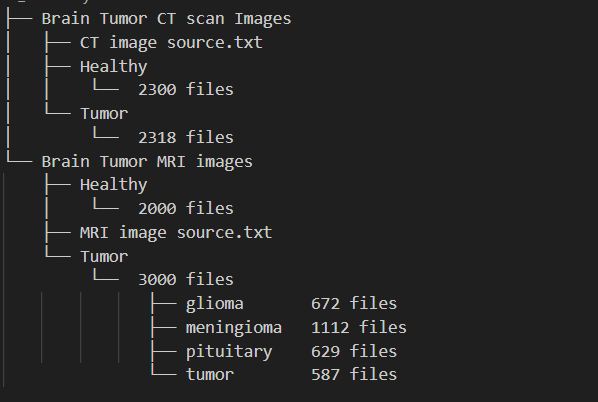

I have a decision to make here, I could identify the presence of a tumor for each method, adding up to 4 classes (CT healthy/tumor + MRI healthy/tumor), but for learning purposes I'll use also the tumor types available at MRI.

This may create an imbalance problem, but lets see the results.

So, I'll proceed with the split

In [7]:
! tree -fL 2 Dataset/

Dataset
├── Dataset/test
│   ├── Dataset/test/ct_healthy
│   ├── Dataset/test/ct_tumor
│   ├── Dataset/test/mri_glioma
│   ├── Dataset/test/mri_healthy
│   ├── Dataset/test/mri_meningioma
│   ├── Dataset/test/mri_pituitary
│   └── Dataset/test/mri_tumor
├── Dataset/train
│   ├── Dataset/train/ct_healthy
│   ├── Dataset/train/ct_tumor
│   ├── Dataset/train/mri_glioma
│   ├── Dataset/train/mri_healthy
│   ├── Dataset/train/mri_meningioma
│   ├── Dataset/train/mri_pituitary
│   └── Dataset/train/mri_tumor
└── Dataset/val
    ├── Dataset/val/ct_healthy
    ├── Dataset/val/ct_tumor
    ├── Dataset/val/mri_glioma
    ├── Dataset/val/mri_healthy
    ├── Dataset/val/mri_meningioma
    ├── Dataset/val/mri_pituitary
    └── Dataset/val/mri_tumor

25 directories, 0 files


In [8]:
!find Dataset -type d -exec sh -c 'echo "{}: $(find "{}" -type f | wc -l) files"' \;

Dataset: 9618 files
Dataset/test: 1445 files
Dataset/test/ct_tumor: 348 files
Dataset/test/mri_glioma: 101 files
Dataset/test/ct_healthy: 345 files
Dataset/test/mri_pituitary: 95 files
Dataset/test/mri_healthy: 300 files
Dataset/test/mri_meningioma: 167 files
Dataset/test/mri_tumor: 89 files
Dataset/val: 1443 files
Dataset/val/ct_tumor: 348 files
Dataset/val/mri_glioma: 101 files
Dataset/val/ct_healthy: 345 files
Dataset/val/mri_pituitary: 94 files
Dataset/val/mri_healthy: 300 files
Dataset/val/mri_meningioma: 167 files
Dataset/val/mri_tumor: 88 files
Dataset/train: 6730 files
Dataset/train/ct_tumor: 1622 files
Dataset/train/mri_glioma: 470 files
Dataset/train/ct_healthy: 1610 files
Dataset/train/mri_pituitary: 440 files
Dataset/train/mri_healthy: 1400 files
Dataset/train/mri_meningioma: 778 files
Dataset/train/mri_tumor: 410 files


# EDA - Exploratory Data Analysis

## Explore images

We will explore the dataset in greater detail to better understand it and try to identify general or structural patterns inherent to the data, enabling us to make better decisions in the model design process. We'll begin showing some random examples

Folder: Dataset/train/ct_tumor


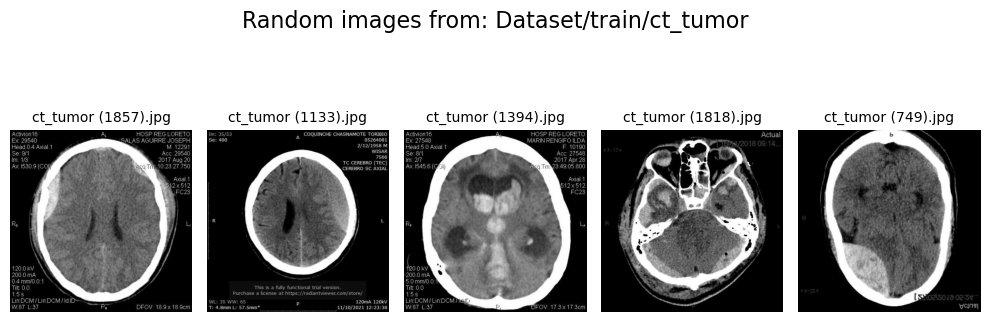

Folder: Dataset/train/mri_glioma


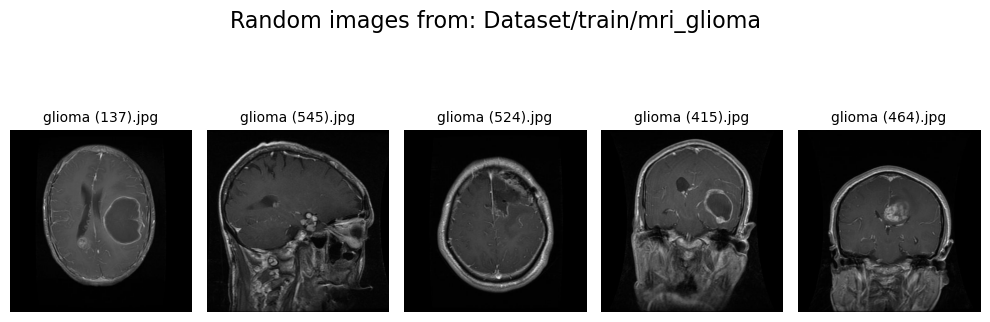

Folder: Dataset/train/ct_healthy


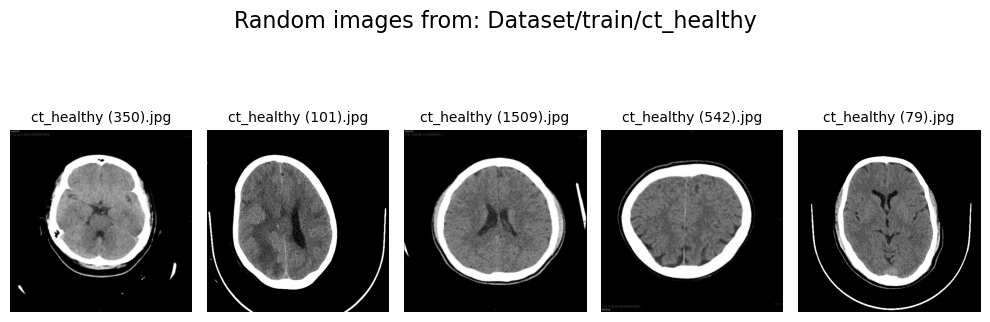

Folder: Dataset/train/mri_pituitary


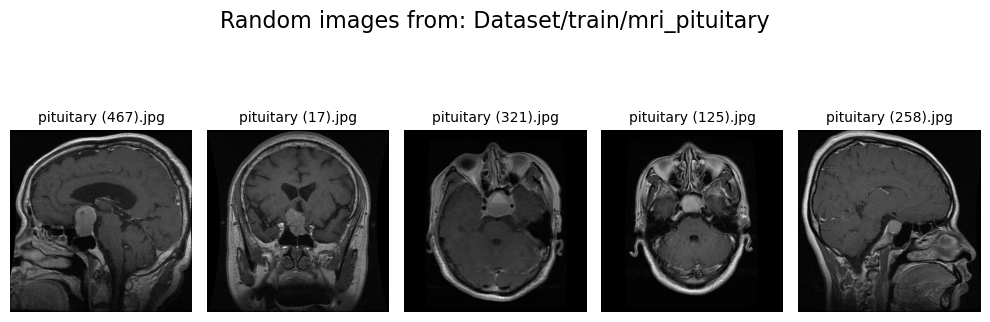

Folder: Dataset/train/mri_healthy


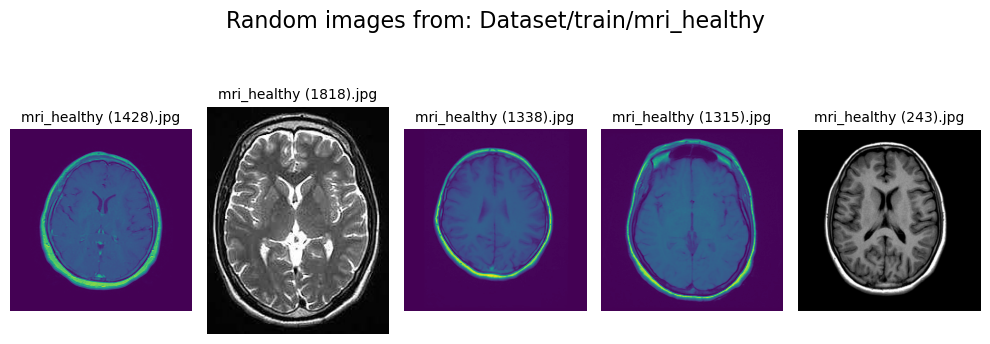

Folder: Dataset/train/mri_meningioma


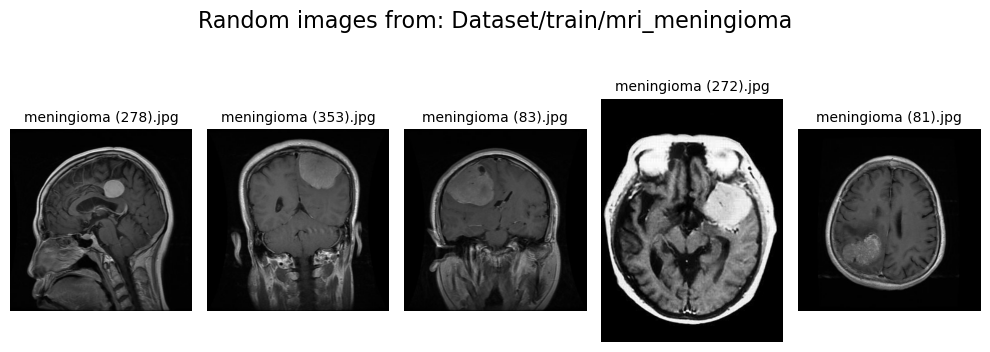

Folder: Dataset/train/mri_tumor


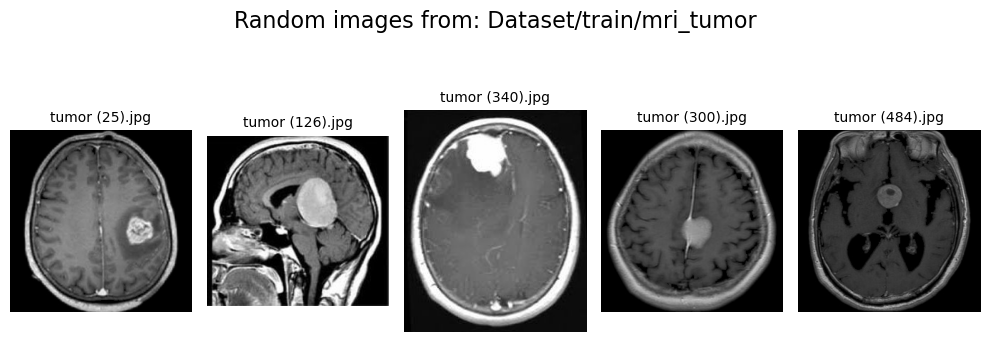

In [53]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Root directory of the dataset
root_dir = "Dataset/train"

# Number of random files to select per folder
num_samples = 5

# Dimensions to resize the images
resize_to = (250, 250)

# Traverse all folders
for root, dirs, files in os.walk(root_dir):
    if files:  # If the folder contains files
        full_paths = [os.path.join(root, f) for f in files]
        random_files = random.sample(full_paths, min(num_samples, len(full_paths)))
        print(f"Folder: {root}")
        
        # Create a plot with subplots
        fig, axes = plt.subplots(1, len(random_files), figsize=(10, 4))
        
        for ax, file in zip(axes, random_files):
            try:
                img = Image.open(file)
                # img = img.resize(resize_to)  # Resize the image
                ax.imshow(img)  # cmap="gray" is optional for grayscale images
                ax.set_title(os.path.basename(file), fontsize=10)
                ax.axis("off")  # Remove axes
            except Exception as e:
                print(f"Could not load image {file}: {e}")
        
        plt.suptitle(f"Random images from: {root}", fontsize=16)
        plt.tight_layout()
        plt.show()


There are some colored images, so let's examine their characteristics in detail, specifically the image mode of each file.

In [35]:
import os
from PIL import Image
from collections import defaultdict

# Main directory to traverse
directory = "Dataset"

# Use os.walk to traverse the directory and its subdirectories
for root, dirs, files in os.walk(directory):
    print(f"Current directory: {root}")
    
    # Dictionary to count image modes
    mode_count = defaultdict(int)
    
    # Count the modes of the images
    for file in files:
        full_path = os.path.join(root, file)
        try:
            with Image.open(full_path) as img:
                mode_count[img.mode] += 1  # Increment the counter for the mode
        except Exception as e:
            print(f"Error processing {file}: {e}")
    
    # Display the results for the current folder
    for mode, count in mode_count.items():
        print(f"Mode: {mode} | Count: {count}")
    
    print("-" * 40)


Current directory: Dataset
----------------------------------------
Current directory: Dataset/test
----------------------------------------
Current directory: Dataset/test/ct_tumor
Mode: RGB | Count: 338
Mode: L | Count: 10
----------------------------------------
Current directory: Dataset/test/mri_glioma
Mode: RGB | Count: 101
----------------------------------------
Current directory: Dataset/test/ct_healthy
Mode: L | Count: 59
Mode: RGB | Count: 285
Mode: RGBA | Count: 1
----------------------------------------
Current directory: Dataset/test/mri_pituitary
Mode: RGB | Count: 95
----------------------------------------
Current directory: Dataset/test/mri_healthy
Mode: L | Count: 37
Mode: RGB | Count: 262
Mode: RGBA | Count: 1
----------------------------------------
Current directory: Dataset/test/mri_meningioma
Mode: RGB | Count: 167
----------------------------------------
Current directory: Dataset/test/mri_tumor
Mode: RGB | Count: 79
Mode: L | Count: 10
------------------------

It also seems that some images have already been augmented, as shown in this example:

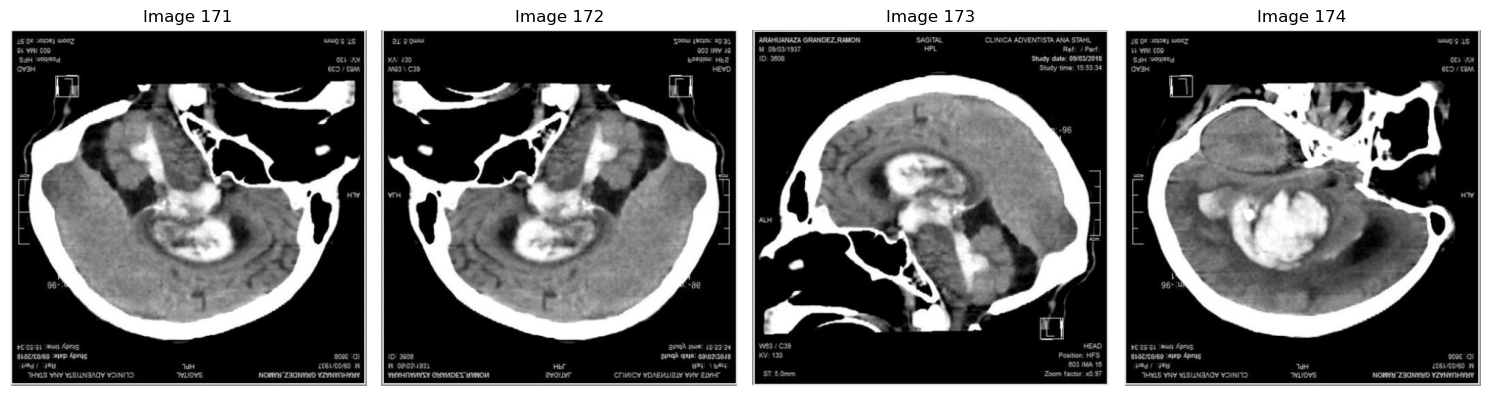

In [50]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the range of image numbers
start = 171
end = 174

# Directory and file pattern
directory = 'Dataset/train/ct_tumor/'
file_pattern = 'ct_tumor ({}).jpg'

# Load the images
images = [Image.open(f"{directory}{file_pattern.format(i)}") for i in range(start, end + 1)]

# Create a figure and axes for side-by-side display
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))  # 1 row, 7 columns

# Loop through the images and display them
for ax, img, num in zip(axes, images, range(start, end + 1)):
    ax.imshow(img)
    ax.axis('off')  # Hide axes for cleaner look
    ax.set_title(f"Image {num}")

# Show the plot
plt.tight_layout()
plt.show()


## EDA Findings

Starting from the most evident characteristics and delving deeper, we can conclude that the dataset includes:

- CT scan and MRI samples from both healthy patients and those with tumors.
- Samples from different sources, resulting in variations such as:
    - The inclusion of patient data within the image.
    - Different cuts and perspectives (frontal, top, lateral, etc.).
    - Images in different modes, specifically some in "L" mode (grayscale) and most in "RGB" mode (colored).
    - Images of varying sizes.
- Data augmentation has already been applied, as there are cases where an image has been rotated and included in the dataset.

## EDA Conclusions and action Plan